In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
curvas_delight_delight_oids = np.load("../resultados\delight_h2f_delight_oids\curvas.npy", allow_pickle=True).item()

results_delight_delight_oids = np.load("../resultados\delight_h2f_delight_oids/test_results.npz")
preds_delight_delight_oids = torch.tensor(results_delight_delight_oids["preds"])
targets_delight_delight_oids = torch.tensor(results_delight_delight_oids["targets"])


curvas_delight_sersic_oids = np.load("../resultados\delight_h2f_sersic_oids\curvas.npy", allow_pickle=True).item()

results_delight_sersic_oids = np.load("../resultados\delight_h2f_sersic_oids/test_results.npz")
preds_delight_sersic_oids = torch.tensor(results_delight_sersic_oids["preds"])
targets_delight_sersic_oids = torch.tensor(results_delight_sersic_oids["targets"])


curvas_autolabeling_sersic_oids = np.load("../resultados/autolabeling_h2f_sersic_oids\curvas.npy", allow_pickle=True).item()

results_autolabeling_sersic_oids = np.load("../resultados/autolabeling_h2f_sersic_oids/test_results.npz")
preds_autolabeling_sersic_oids = torch.tensor(results_autolabeling_sersic_oids["preds"])
targets_autolabeling_sersic_oids = torch.tensor(results_autolabeling_sersic_oids["targets"])

In [3]:
curvas_recenter = np.load("../resultados/recenter_h2f_sersic_oids\curvas.npy", allow_pickle=True).item()

results_recenter = np.load("../resultados/recenter_h2f_sersic_oids/test_results.npz")
preds_recenter = torch.tensor(results_recenter["preds"])
targets_recenter = torch.tensor(results_recenter["targets"])


curvas_recenter_norm = np.load("../resultados/recenter_h2f_sersic_oids_norm\curvas.npy", allow_pickle=True).item()



curvas_delight_sersic_oids2 = np.load("../resultados\delight_h2f_sersic_oids_2\curvas.npy", allow_pickle=True).item()

results_delight_sersic_oids2 = np.load("../resultados\delight_h2f_sersic_oids_2/test_results.npz")
preds_delight_sersic_oids2 = torch.tensor(results_delight_sersic_oids2["preds"])
targets_delight_sersic_oids2 = torch.tensor(results_delight_sersic_oids2["targets"])


curvas_autolabeling_sersic_oids2 = np.load("../resultados/autolabeling_h2f_sersic_oids2\curvas.npy", allow_pickle=True).item()

results_autolabeling_sersic_oids2 = np.load("../resultados/autolabeling_h2f_sersic_oids2/test_results.npz")
preds_autolabeling_sersic_oids2 = torch.tensor(results_autolabeling_sersic_oids2["preds"])
targets_autolabeling_sersic_oids2 = torch.tensor(results_autolabeling_sersic_oids2["targets"])


### Functions

In [4]:
def curves_comparisson(curves_list, experiment_names):
    """
    Muestra dos subplots: uno con curvas de entrenamiento y otro con curvas de validación.

    Args:
        curves_list (list of dict): Cada dict debe tener 'train_loss' y 'val_loss'.
        experiment_names (list of str): Nombres de los experimentos, uno por cada curva.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    for curves, name in zip(curves_list, experiment_names):
        epochs = np.arange(len(curves["train_loss"])) + 1
        ax1.plot(epochs, curves['train_loss'], label=name)
        ax2.plot(epochs, curves['val_loss'], label=name)

    ax1.set_title("Training Loss")
    ax2.set_title("Validation Loss")

    for ax in [ax1, ax2]:
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Loss")
        ax.legend()

    plt.tight_layout()
    plt.show()

In [5]:
def print_mse_per_transformation(targets, predictions):

    mse = torch.nn.MSELoss()
    transformations =  {0: "Original",
                        1: "Rotation 90°",
                        2: "Rotation 180°",
                        3: "Rotation 270°",
                        4: "Horizontal Flip",
                        5: "Horizontal Flip + Rotation 90°",
                        6: "Horizontal Flip + Rotation 180°",
                        7: "Horizontal Flip + Rotation 270°",
                        }
    
    for pos, name in transformations.items():
        print(f"{name}: MSE = {mse(targets[:,pos,:], predictions[:,pos,:])}")

### Curves

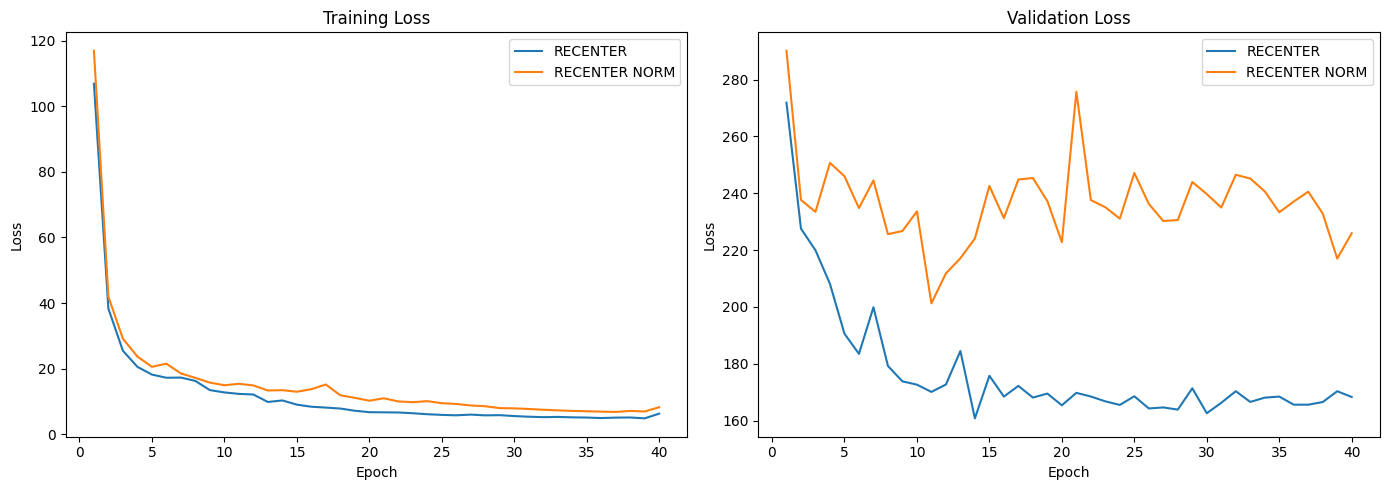

In [6]:
curves_comparisson(
    [curvas_recenter, curvas_recenter_norm],
    ["RECENTER",  "RECENTER NORM"]
)

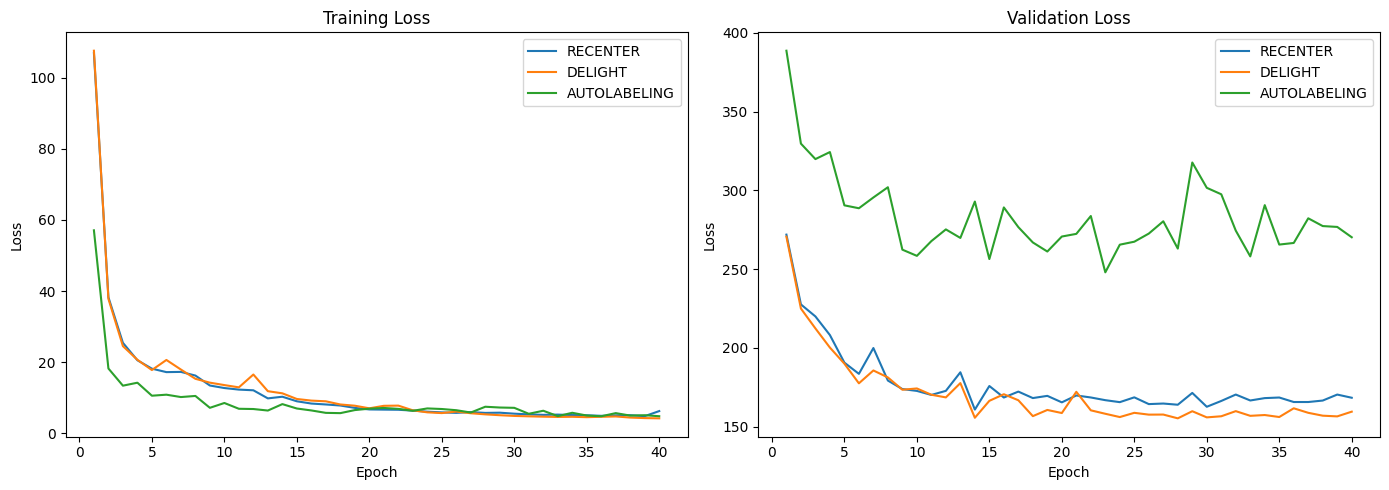

In [7]:
curves_comparisson(
    [curvas_recenter, curvas_delight_sersic_oids2, curvas_autolabeling_sersic_oids2],
    ["RECENTER", "DELIGHT", "AUTOLABELING"]
)

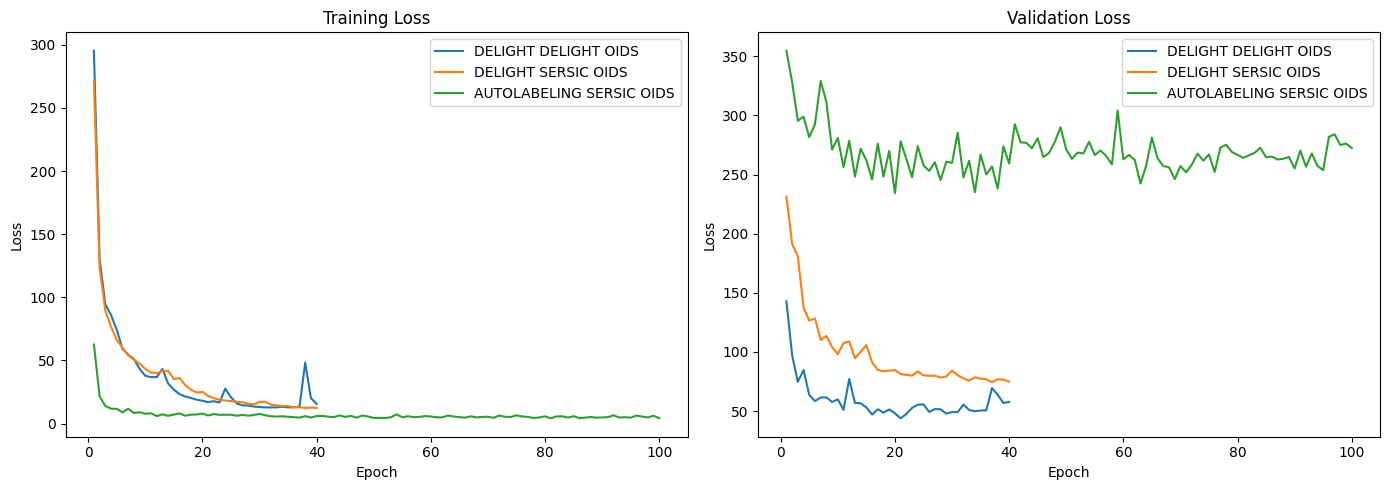

In [11]:
curves_comparisson(
    [curvas_delight_delight_oids, curvas_delight_sersic_oids,curvas_autolabeling_sersic_oids ],
    ["DELIGHT DELIGHT OIDS", "DELIGHT SERSIC OIDS", "AUTOLABELING SERSIC OIDS"]
)

### Metrics

In [20]:
print_mse_per_transformation(targets_delight_delight_oids, preds_delight_delight_oids)

Original: MSE = 58.14418029785156
Rotation 90°: MSE = 60.03158187866211
Rotation 180°: MSE = 57.3000602722168
Rotation 270°: MSE = 58.88551330566406
Horizontal Flip: MSE = 57.6259651184082
Horizontal Flip + Rotation 90°: MSE = 61.41012191772461
Horizontal Flip + Rotation 180°: MSE = 60.537593841552734
Horizontal Flip + Rotation 270°: MSE = 56.69508361816406


In [21]:
print_mse_per_transformation(targets_delight_sersic_oids, preds_delight_sersic_oids)

Original: MSE = 72.4997329711914
Rotation 90°: MSE = 69.23120880126953
Rotation 180°: MSE = 69.22428131103516
Rotation 270°: MSE = 69.0481185913086
Horizontal Flip: MSE = 66.85509490966797
Horizontal Flip + Rotation 90°: MSE = 71.49365234375
Horizontal Flip + Rotation 180°: MSE = 68.2596435546875
Horizontal Flip + Rotation 270°: MSE = 74.25176239013672


In [22]:
print_mse_per_transformation(targets_autolabeling_sersic_oids, preds_autolabeling_sersic_oids)

Original: MSE = 264.9316101074219
Rotation 90°: MSE = 266.8855895996094
Rotation 180°: MSE = 266.3545227050781
Rotation 270°: MSE = 267.41607666015625
Horizontal Flip: MSE = 267.91119384765625
Horizontal Flip + Rotation 90°: MSE = 263.7978820800781
Horizontal Flip + Rotation 180°: MSE = 268.6310729980469
Horizontal Flip + Rotation 270°: MSE = 267.22515869140625


In [14]:
print_mse_per_transformation(targets_autolabeling_sersic_oids2, preds_autolabeling_sersic_oids2)

Original: MSE = 265.0826110839844
Rotation 90°: MSE = 264.2651672363281
Rotation 180°: MSE = 261.1158142089844
Rotation 270°: MSE = 266.78814697265625
Horizontal Flip: MSE = 267.1795959472656
Horizontal Flip + Rotation 90°: MSE = 266.32110595703125
Horizontal Flip + Rotation 180°: MSE = 266.73828125
Horizontal Flip + Rotation 270°: MSE = 261.5283508300781
